In [65]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 06:11:21--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.3’

bike+sharing+datase     [ <=>                ] 273.43K  --.-KB/s    in 0.04s   

2024-08-27 06:11:21 (6.37 MB/s) - ‘bike+sharing+dataset.zip.3’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [125]:
import pandas as pd
df1 = pd.read_csv('hour.csv')

In [126]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [127]:
df1['day_night'] = df1['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

df1['dteday'] = pd.to_datetime(df1.dteday)
df1['season'] = df1.season.astype('category')
df1['holiday'] = df1.holiday.astype('category')
df1['weekday'] = df1.weekday.astype('category')
df1['weathersit'] = df1.weathersit.astype('category')
df1['workingday'] = df1.workingday.astype('category')
df1['mnth'] = df1.mnth.astype('category')
df1['yr'] = df1.yr.astype('category')
df1['hr'] = df1.hr.astype('category')
df1.drop(columns=['dteday'], inplace=True)

In [128]:
X = df1.drop(columns=['cnt']) # Features
y = df1['cnt']

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [130]:
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')), # Impute missing values with mean
('scaler', MinMaxScaler()) # Normalize using MinMaxScaler
])

In [143]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False, drop='first'))
])

In [132]:
X_encoded = categorical_pipeline.fit_transform(X[categorical_features],y) # X_encoded will be a numpy array


In [133]:
X_encoded = pd.DataFrame(X_encoded,
columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features))

In [134]:
X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

In [135]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,
random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train1, y_train1)

RandomForestRegressor(random_state=42)

In [138]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train1.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

<Axes: >

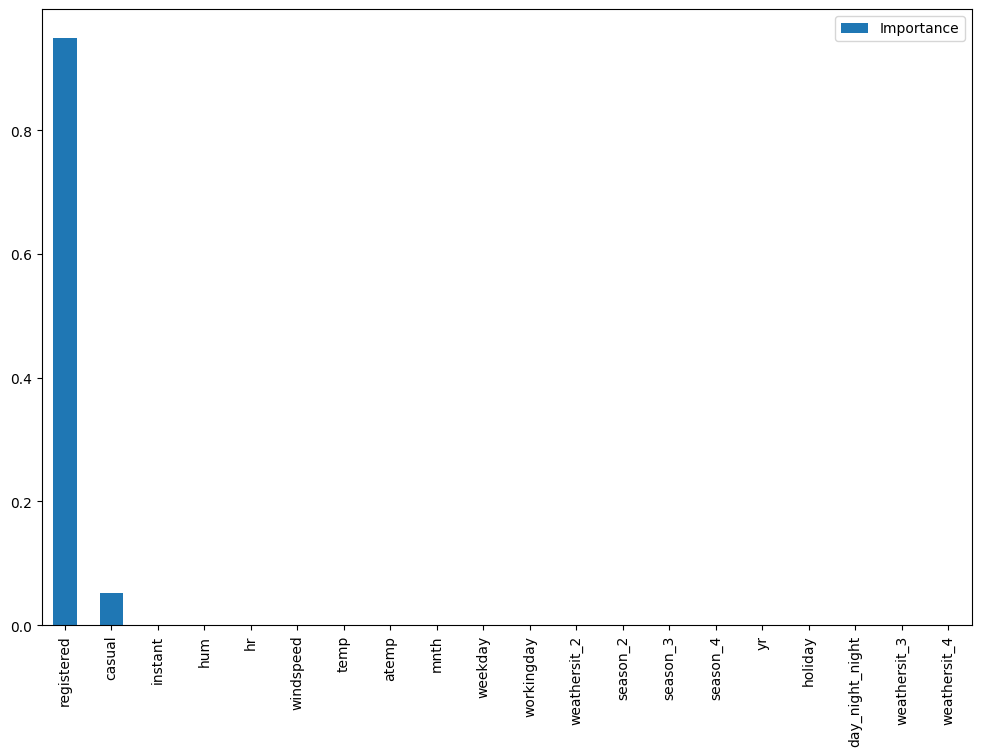

In [139]:
feat_importances.plot(kind='bar', figsize=(12,8))

In [140]:
final_pipeline = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [141]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

In [142]:
# from category_encoders import TargetEncoder
# categorical_features = ['season', 'weathersit', 'day_night']
# categorical_pipeline = Pipeline([
# ('imputer', SimpleImputer(strategy='most_frequent')),
# ('targetencoder', TargetEncoder())
# ])

In [144]:
y_pred = model.predict(X_test1)

In [145]:
mse = mean_squared_error(y_test1, y_pred)
r2 = r2_score(y_test1, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.391429804372842
R-squared: 0.9997665771738811


In [112]:
final_pipeline = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

**Target Encoder**

In [148]:
X=df1.drop(columns=['cnt'])

In [149]:
from category_encoders import TargetEncoder
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('targetencoder', TargetEncoder())
])

In [150]:

X[categorical_features]= categorical_pipeline.fit_transform(X[categorical_features], y)

In [151]:
X.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'day_night'],
      dtype='object')

In [152]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2,
random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

In [153]:
y_pred = rf.predict(X_test2)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test1, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.527480926352131
R-squared: 0.999762280652338


In [154]:
final_pipeline_rf=Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [155]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline_rf

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('targetencoder',
                                  TargetEncoder(cols=[0, 1, 2]))])),
                ('model', RandomForestRegressor(random_state=42))])

**Linear Regression from package using target encoder**

In [156]:
import pandas as pd
df = pd.read_csv('hour.csv')
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [157]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

In [158]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

In [159]:
df['hum x temp'] = df['hum'] * df['temp']
df['hum x windspeed'] = df['hum'] * df['windspeed']
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night,hum x temp,hum x windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night,0.1944,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night,0.1760,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night,0.1760,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night,0.1800,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night,0.1800,0.0


In [160]:
df.describe()

,temp,atemp,hum,windspeed,cnt,hum x temp,hum x windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,189.463088,0.309129,0.112388
std,0.192556,0.171850,0.192930,0.122340,181.387599,0.145062,0.075504
min,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000,0.182000,0.067200
50%,0.500000,0.484800,0.630000,0.194000,142.000000,0.299200,0.104017
75%,0.660000,0.621200,0.780000,0.253700,281.000000,0.429000,0.152252
max,1.000000,1.000000,1.000000,0.850700,977.000000,0.623000,0.743862


In [161]:
X = df.drop(columns='cnt')
y = df['cnt']

In [162]:
X.shape

(17379, 15)

In [163]:
y.shape

(17379,)

In [164]:
X. columns. values

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day_night',
       'hum x temp', 'hum x windspeed'], dtype=object)

In [165]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import TargetEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [207]:
numerical_features = ['temp', 'hum', 'windspeed', 'hum x temp', 'hum x windspeed']
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')), # Impute missing values with mean
('scaler', MinMaxScaler()) # Normalize using MinMaxScaler
])

In [208]:
X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])

In [209]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day_night',
       'hum x temp', 'hum x windspeed'],
      dtype='object')

In [210]:

pip install category_encoders

In [211]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('target', TargetEncoder(target_type="continuous"))
])

In [212]:
X[categorical_features]= categorical_pipeline.fit_transform(X[categorical_features],y)

In [213]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day_night',
       'hum x temp', 'hum x windspeed'],
      dtype='object')

In [214]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,day_night,hum x temp,hum x windspeed
0,58.741990,0,1,0,0,6,0,204.234665,0.224490,0.2879,0.81,0.0,106.085839,0.312039,0.0
1,101.095676,0,1,1,0,6,0,239.808803,0.204082,0.2727,0.80,0.0,58.870024,0.282504,0.0
2,127.637467,0,1,2,0,6,0,231.916247,0.204082,0.2727,0.80,0.0,130.619567,0.282504,0.0
3,117.011728,0,1,3,0,6,0,217.829938,0.224490,0.2879,0.75,0.0,111.246162,0.288925,0.0
4,94.321931,0,1,4,0,6,0,203.913418,0.224490,0.2879,0.75,0.0,103.010298,0.288925,0.0


In [215]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [216]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [217]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15563.854533768277
R-squared: 0.5084903724004544


In [218]:
final_pipeline_lr_package = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', LinearRegression())
])

In [219]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline_lr_package

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('target',
                                  TargetEncoder(target_type='continuous'))])),
                ('model', LinearRegression())])

**Package using one hot encoder**

In [220]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False))
])

In [221]:
X_encoded = categorical_pipeline.fit_transform(X[categorical_features],y) # X_encoded will be a numpy array


In [222]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'day_night',
       'hum x temp', 'hum x windspeed'],
      dtype='object')

In [223]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [224]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15563.854533768277
R-squared: 0.5084903724004544


In [225]:
final_pipeline_lr_package_one_hot = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', LinearRegression())
])

In [226]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline_lr_package_one_hot

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(sparse_output=False))])),
                ('model', LinearRegression())])

**Using from scratch and one hot encoder**

In [227]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder(sparse_output=False))
])

In [228]:
import numpy as np
def transpose(A):
  rows, cols = A.shape
  c = np.zeros((cols, rows))
  for i in range(rows):
    for j in range(cols):
      c[j][i] = A[i][j]
  return c
class Linear_Regression():
  def __init__(self):
    self.coefficient=None
  def fit(self, X, y):
    rows, cols = X.shape
    X = np.column_stack((np.ones(rows), X))
    Xt = transpose(X)
    m = np.linalg.solve(np.dot(Xt, X), np.dot(Xt, y))
    self.coefficient = m

  def predict(self, X):
    rows, cols = X.shape
    X = np.column_stack((np.ones(rows), X))
    return np.dot(X, self.coefficient)

In [229]:
lr = Linear_Regression()
lr.fit(X_train, y_train)

In [230]:
y_pred = lr.predict(X_test)

In [231]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15563.85453376829
R-squared: 0.5084903724004539


In [232]:
final_pipeline_scratch_one_hot = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', Linear_Regression())
])

In [236]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline_scratch_one_hot


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(sparse_output=False))])),
                ('model',
                 <__main__.Linear_Regression object at 0x7a6957a11d20>)])

**Using from scratch and target encoder**

In [237]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('target', TargetEncoder(target_type="continuous"))
])

In [238]:
X[categorical_features] = categorical_pipeline.fit_transform(X[categorical_features], y)

In [240]:
lr=Linear_Regression()


In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [242]:
lr.fit(X_train, y_train)

In [243]:
y_pred=lr.predict(X_test)

In [244]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 16359.23239973187
R-squared: 0.48337218089766887


In [245]:
final_pipeline_scratch_target = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', Linear_Regression())
])

In [246]:
from sklearn import set_config
set_config(display='diagram')
final_pipeline_scratch_target

Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('target',
                                  TargetEncoder(target_type='continuous'))])),
                ('model',
                 <__main__.Linear_Regression object at 0x7a695dbe9e70>)])